# linear regression with wines

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

data from 
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
change semicolons to commas before import

In [50]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [51]:
# read the data into a pandas array
dataset = pd.read_csv('./winequality.csv')
dataset.shape

(4898, 12)

In [52]:
# dataset.describe shows the names of the columns (series) and the ranges in them. 
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## clean the data of null/NaN columns

In [53]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## filling in NAN things
just in case you got a true, you would do this

In [54]:
dataset = dataset.fillna(method='ffill')

In [55]:
# seperate the data from attributes, in this case quality is what we are lerning about

In [56]:
X = pd.DataFrame(dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values)
X.columns = [['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]


y = dataset['quality'].values

In [57]:
X.shape

(4898, 11)

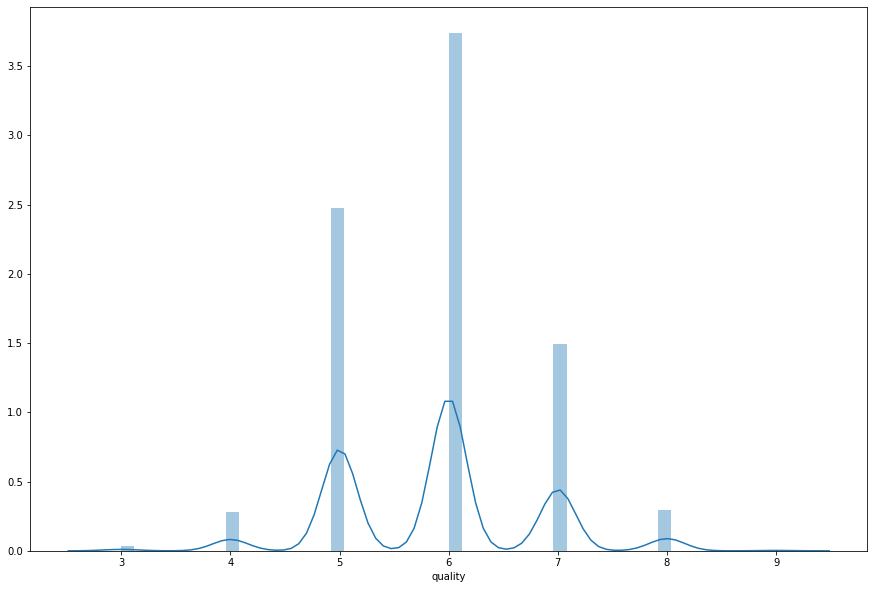

In [58]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [59]:
# split the data 80/20 train/test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# do the thing 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 1.06981517e-01 -1.81032516e+00 -1.51630286e-02  9.29140769e-02
 -5.56723628e-01  4.43552129e-03 -2.86630409e-04 -1.88992556e+02
  8.22368627e-01  6.38975597e-01  1.37843182e-01]


In [62]:
print (X.shape)

X.columns

(4898, 11)


MultiIndex([(       'fixed acidity',),
            (    'volatile acidity',),
            (         'citric acid',),
            (      'residual sugar',),
            (           'chlorides',),
            ( 'free sulfur dioxide',),
            ('total sulfur dioxide',),
            (             'density',),
            (                  'pH',),
            (           'sulphates',),
            (             'alcohol',)],
           )

In [63]:
# and after the magic box, we have...
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])  
coeff_df
# ta daa!!

,Coefficients
fixed acidity,0.106982
volatile acidity,-1.810325
citric acid,-0.015163
residual sugar,0.092914
chlorides,-0.556724
free sulfur dioxide,0.004436
total sulfur dioxide,-0.000287
density,-188.992556
pH,0.822369
sulphates,0.638976


In [64]:
y_pred = regressor.predict(X_test)

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [68]:
df1

,Actual,Predicted
0,5,5.590650
1,6,5.466122
2,7,6.088268
3,8,6.793538
4,5,5.970548
5,4,4.154233
6,6,6.538580
7,5,6.271539
8,7,5.943391
9,5,5.793337


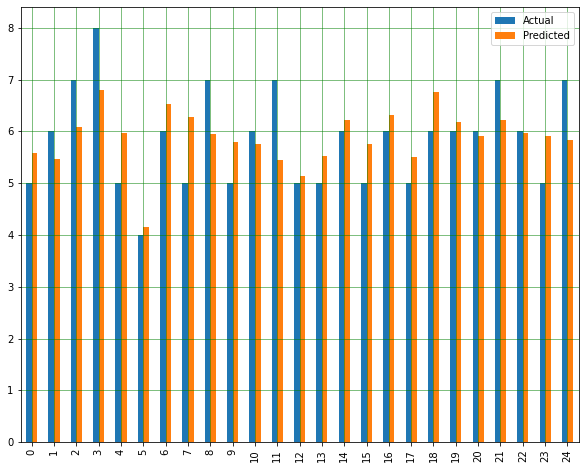

In [69]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6297007608008107
Mean Squared Error: 0.6598453517957839
Root Mean Squared Error: 0.8123086554972708
